In [49]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import datetime as dt
from datetime import datetime  
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils  import plot_model
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Dense, Dropout,Flatten,Activation,LSTM
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
sns.set_style("whitegrid")

df_data = pd.read_csv('stock.csv')
df_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [50]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [51]:
df = df_data[df_data['Name'] == 'AAPL']
df.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [53]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [54]:
# 检查所有列是否有重复行
df.duplicated().sum()

0

In [55]:
#总结性统计数据
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [56]:
#重置索引
df.reset_index(drop=True, inplace=True)
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


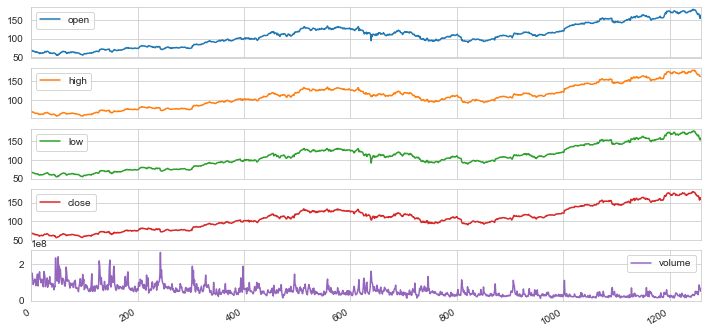

In [57]:
#绘制'open', 'high', 'low', 'close', 'volume'变化的折线图
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

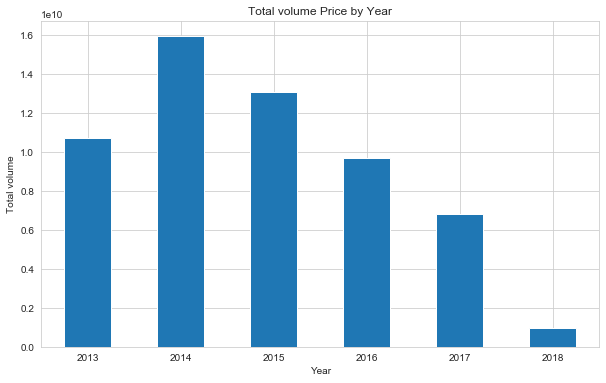

In [88]:
# 转换日期列为datetime类型
df.loc[:, 'date'] = pd.to_datetime(df['date'])
# 提取年份
df.loc[:, 'year'] = df['date'].dt.year
# 计算每年的close总量
yearly_close_sum = df.groupby('year')['volume'].sum()
# 绘制每年的close总量直方图
yearly_close_sum.plot(kind='bar', figsize=(10, 6))

# 设置图表标题和标签
plt.title('Total volume Price by Year')
plt.xlabel('Year')
plt.ylabel('Total volume')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

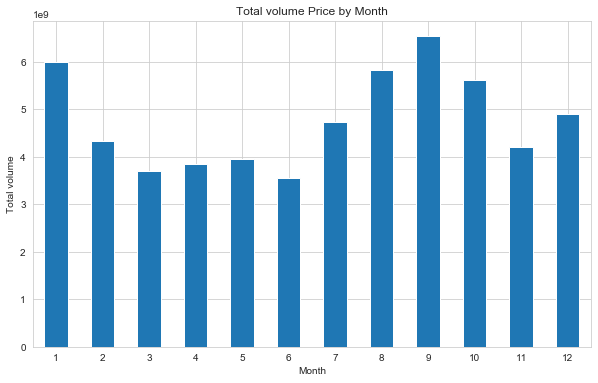

In [89]:
# 绘制每月的close总量直方图
df.loc[:,'month'] = df['date'].dt.month
monthly_close_sum = df.groupby('month')['volume'].sum()
monthly_close_sum.plot(kind='bar', figsize=(10, 6))
# 设置图表标题和标签
plt.title('Total volume Price by Month')
plt.xlabel('Month')
plt.ylabel('Total volume')
plt.xticks(rotation=0)


D:\anaconda_environment\envs\py001\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


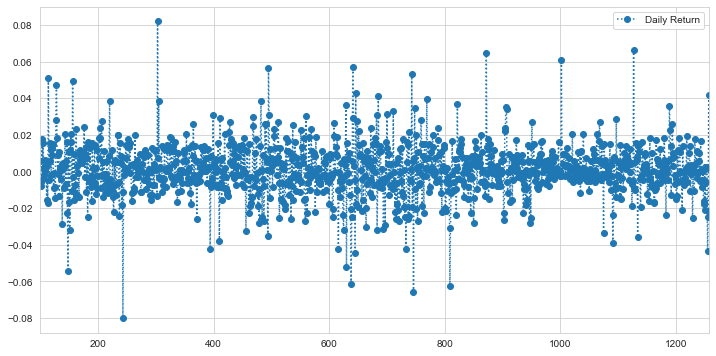

In [91]:
#收盘价每日的变化率，存储在Daily Return
df['Daily Return'] = df['close'].pct_change()
# plot the daily return percentage
df['Daily Return'].plot(figsize=(12,6),legend=True,linestyle=':',marker='o')


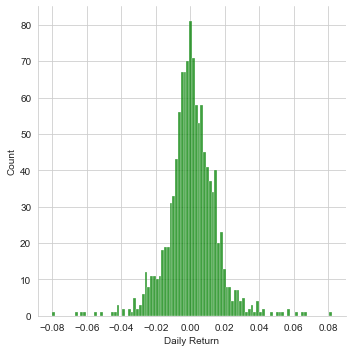

In [92]:
#收盘价每日的变化率直方图汇总
sns.displot(df['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [93]:
#增加10,50,100天的移动平均
ma_day = [10,50,100]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['close'],ma).mean()

df

D:\anaconda_environment\envs\py001\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,open,high,low,close,volume,Name,year,month,Daily Return,MA for 10 days,MA for 50 days,MA for 100 days
99,2013-07-02,58.5657,60.2328,58.4957,59.7842,117442150,AAPL,2013,7,NaN,NaN,NaN,NaN
100,2013-07-03,60.1228,60.4257,59.6357,60.1142,60232158,AAPL,2013,7,0.005520,NaN,NaN,NaN
101,2013-07-05,60.0557,60.4699,59.3357,59.6314,68505794,AAPL,2013,7,-0.008031,NaN,NaN,NaN
102,2013-07-08,60.0157,60.1428,58.6642,59.2928,74521398,AAPL,2013,7,-0.005678,NaN,NaN,NaN
103,2013-07-09,59.0857,60.4999,58.6257,60.3357,88142026,AAPL,2013,7,0.017589,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,2018,2,0.002090,171.948,172.8252,166.9647
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,2018,2,-0.043390,170.152,172.6356,166.9547
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,2018,2,-0.024984,168.101,172.3026,166.9110
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,2018,2,0.041792,166.700,172.0640,166.9448


In [94]:
#均值填充
#df.fillna(df.mean(), inplace=True)
# 删除包含空值的行
df = df.dropna()
df.head()

,date,open,high,low,close,volume,Name,year,month,Daily Return,MA for 10 days,MA for 50 days,MA for 100 days
198,2013-11-20,74.1756,74.3456,73.4756,73.5714,48545798,AAPL,2013,11,-0.008758,74.27242,71.587800,68.862524
199,2013-11-21,73.9428,74.4585,73.3814,74.4479,65506861,AAPL,2013,11,0.011914,74.39590,71.726216,69.009161
200,2013-11-22,74.2171,74.5942,74.0756,74.2571,55931232,AAPL,2013,11,-0.002563,74.38505,71.883074,69.150590
201,2013-11-25,74.4314,75.1242,74.4285,74.8199,57348403,AAPL,2013,11,0.007579,74.45208,72.093416,69.302475
202,2013-11-26,74.8742,76.5914,74.8571,76.1999,100345728,AAPL,2013,11,0.018444,74.64336,72.316502,69.471546


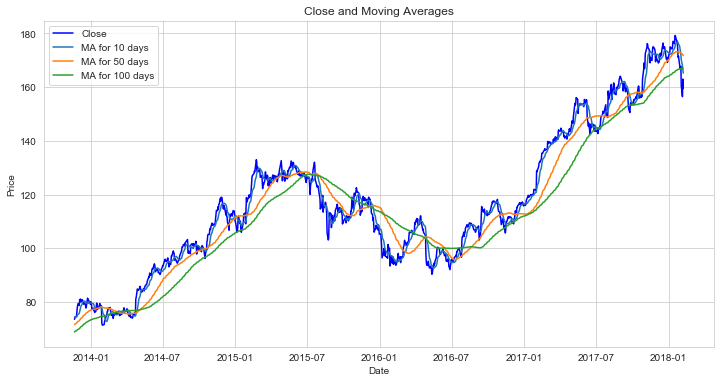

In [95]:
# 绘制折线图
plt.figure(figsize=(12, 6))

# Close
plt.plot(df['date'], df['close'], label='Close', color='blue')

# Moving Averages
for ma in ma_day:
    column_name = "MA for %s days" % ma
    plt.plot(df['date'], df[column_name], label=column_name)

# 设置图例、标题和标签
plt.legend()
plt.title('Close and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# 显示图表
plt.show()

In [96]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'year',
       'month', 'Daily Return', 'MA for 10 days', 'MA for 50 days',
       'MA for 100 days'],
      dtype='object')

In [97]:
X = df[['open','high','low','volume','year','month','MA for 10 days', 'MA for 50 days']]
y = df[['close']]

In [98]:
# 创建 MinMaxScaler 对象
sc = MinMaxScaler(feature_range=(0, 1))
# 对数据集进行归一化
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [99]:
# 定义函数，将序列数据转换为适合CNN-LSTM模型的输入格式
def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

# Create sequences with time step 2
time_steps=20
train_X, train_Y = create_sequences(X, y, time_steps)
train_X.shape,train_Y.shape

((1041, 20, 8), (1041, 1))

In [100]:
#划分数据集
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((832, 20, 8), (209, 20, 8), (832, 1), (209, 1))

In [108]:
#将数据转换为适合模型输入的数据
X_train = X_train.reshape(X_train.shape[0],1,20,8)
X_test = X_test.reshape(X_test.shape[0],1,20,8)

#CNN-LSTM模型
cs_model = tf.keras.Sequential()
cs_model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu'), input_shape=(None,20,8)))
cs_model.add(Dropout(0.3))
cs_model.add(TimeDistributed(Flatten()))
cs_model.add(Bidirectional(LSTM(64, return_sequences=False)))
cs_model.add(Dropout(0.3))
cs_model.add(Dense(1, activation='sigmoid'))
cs_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
#训练模型
history = cs_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
24/24 [==============================] - 2s 34ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.1146 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0563
Epoch 2/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0531 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0500
Epoch 3/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0495 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0461
Epoch 4/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0435 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0422
Epoch 5/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0422 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0411
Epoch 6/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0409 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0389
Epoch 7/50
24/24 [======

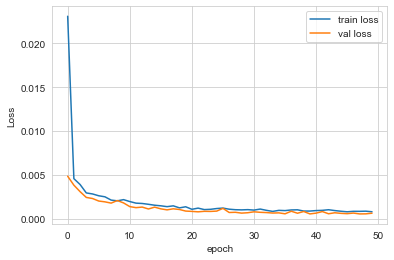

In [109]:
#模型训练过程损失可视化
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [110]:
y_pred = cs_model.predict(X_test)
#评估函数
def evaluation_metric(y_test,y_pre):
    MSE = metrics.mean_squared_error(y_test,y_pre)
    RMSE = MSE**0.5
    MAE = metrics.mean_absolute_error(y_test,y_pre)
    print('MSE: %.5f' % MSE)
    print('RMSE: %.5f' % RMSE)
    print('MAE: %.5f' % MAE)
y_pred = np.array(y_pred, dtype='float64').flatten()
y_test = np.array(y_test, dtype='float64').flatten()

from keras import metrics
# 评估模型
evaluation_metric(y_test,y_pred)


MSE: 0.00069
RMSE: 0.02630
MAE: 0.02052


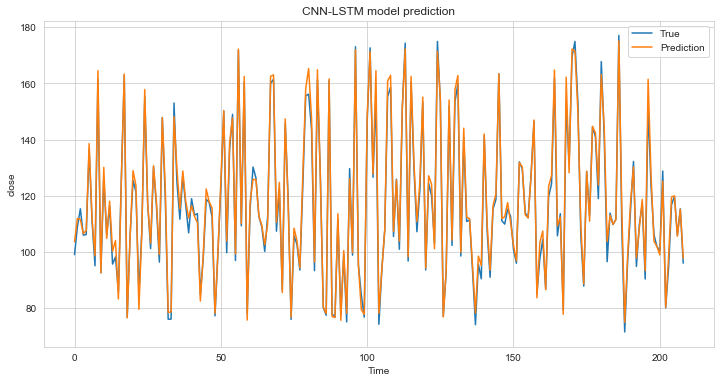

In [113]:
y_test = y_test.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

# 将归一化后的数据逆转换回原始范围
y_test1 = sc.inverse_transform(y_test)
y_pre1 = sc.inverse_transform(y_pred)
#真实值和预测值对比
plt.figure(figsize = (12,6))
plt.plot( y_test1, label='True')
plt.plot(y_pre1, label='Prediction')
plt.title('CNN-LSTM model prediction')
plt.xlabel('Time', verticalalignment='top')
plt.ylabel('close', horizontalalignment='center')
plt.legend()
plt.show()

In [114]:
y_pre1 = np.array(y_pre1, dtype='float64').flatten()
y_test1 = np.array(y_test1, dtype='float64').flatten()
#真实值误差
evaluation_metric(y_test1,y_pre1)

MSE: 8.04507
RMSE: 2.83638
MAE: 2.21319


In [83]:
df_data['Name'].nunique()

505